ADS Sample Notebook.

Copyright (c) 2019 Oracle, Inc. All rights reserved. Licensed under the Universal Permissive License v 1.0 as shown at https://oss.oracle.com/licenses/upl.

***
# <font color=red>ADS API を使った社員の離職率予測</font>
<p style="margin-left:10%; margin-right:10%;">produced by the <font color=teal> Oracle ADS Team </font></p>
<p style="margin-left:10%; margin-right:10%;">remaked by  <font color=teal> Xue Shu Fei(bob.fei@oracle.com) and Kenichi Sonoda(kenichi.sonoda@oracle.com)<font color=teal>  </font></p>

***

## 概要

このノートブックでは、社員のデモグラフィックデータセットを使用して、データを理解するための探索的データ分析を実行します。次に、AutoMLを使用してモデルをトレーニングし、それを使用して予測を行い、モデルが問題に対してどれほど一般化されているかを評価します。モデルが一定の要件を満たした場合、モデルがどのように機能するかを調査します。その後、モデルおよび予測結果についての理解を深め、実ビジネスでこのモデルが使えるようにします。

## コースのレベル

初学者向け (Pythonでの機械学習のコーディング経験があることが望ましい。)
  
## シナリオ

企業は従業員の離職に起因する莫大なコストに直面しています。トレーニング費用や、従業員が生産的なメンバーになるまでの時間など、一部のコストは具体的です。ただし、最も重要なコストは抽象的で定量化できないものです。生産的な従業員が離職することにより、失われるものを考えてください。新製品のアイデア、優れたプロジェクト管理、顧客関係などです。機械学習とデータサイエンスの進歩により、従業員の離職を予測するだけでなく、離職率に影響を与える主要な変数を理解することが可能になります。

## タスク

このHands-on Lab.は別途用意された Accerlerated Data Science(ADS) Hands-on Lab.のPPTファイルの内容に沿って進められます。このファイルの中で説明される各ワークフロー毎にタスクがあります。各タスク内のオプションタスクについては時間に余裕がある場合に実施してください。

 - <a href='#loadingdata'>Task 1 : Loading Data</a>
 - <a href='#datavisualization'>Task 2 : Data Visualization</a>
 - <a href='#datatransformations'>Task 3 : Data Transformations</a>
 - <a href='#trainingmodels'>Task 4 : Training Models</a>
 - <a href='#modelevaluation'>Task 5 : Model Evaluation</a>
 - <a href='#modelexplainability'>Task 6 : Model Explainability</a>
 - <a href='#savemodel'>Task 7 : Save your model to your Catalog</a>

 ***

<a id='loadingdata'></a>
## <u>Task 1 : Loading Data</u>
##### https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/loading_data/loading_data.html

### データセットについての理解

まずは、バイナリ分類の概要を理解してみましょう。バイナリ分類は、次の分類規則に基づいて、特定のデータセットのレコード/要素を2つのグループに分類する手法です。従業員の離職予測をLeave(離職する)またはNot Leave(離職しない)がという2つの異なるグループに予測分類します。

これらの分類ルールは、従業員と従業員が退職したかどうかに関する情報を含むトレーニングデータセットを使用してモデルをトレーニングするときに生成されます。

これは架空のデータセットであり、約1500行含まれています。

<font color=gray>このデータセットは3rd partyのため、オラクルとの契約に基づくコンテンツおよびマテリアルとは見なされません。。 データセット `orcl_attrition` の利用許諾については [こちら](oracle_data/UPL.txt)をご参照ください。データセット`orcl_attrition` はUPLライセンスの基に配布されます。 
</font>

まず必要なライブラリをimportします。

In [49]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import logging

logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

from ads.dataset.factory import DatasetFactory

データをロードする前に、Terminalを起動してデータの内容を確認します。

In [ ]:
%%bash 

$ cat /home/datascience/ads-examples/oracle_data/orcl_attrition.csv

csvファイルをデータセットとしてロードします。下記の例では、予測対象の特徴量を同時に指定しています。

In [50]:
ds = DatasetFactory.open("/home/datascience/ads-examples/oracle_data/orcl_attrition.csv", target="Attrition").set_positive_class('Yes')

### Option Tasks

以下のコードで処理中のCPU、メモリの使用率の確認ができます。

In [69]:
from ads.common.analyzer import resource_analyze
from ads.dataset.factory import DatasetFactory

@resource_analyze
def fetch_data():
    ds2 = DatasetFactory.open("/home/datascience/ads-examples/oracle_data/orcl_attrition.csv", target="Attrition").set_positive_class('Yes')
    return ds

ds = fetch_data()

Loading BokehJS ...

---
<a id='datavisualization'></a>
## <u>Task 2 : Data Visualization</u>
##### https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/visualization/visualization.html

データセットを `show_in_notebook` 関数に渡すことで、下記の4項目について確認することができます。

  - Summary : データセット、行、列の簡単な説明、および特徴量の種類の内訳を示しています。
  - Feature summary : 各特徴量の分布をボックスプロットやカウンタプロットなどのチャートで確認できます。
  - Correlations - 各特徴量がどのような値をとるのかを確認できます。(numeric or categoricalなど)
  - Data : データの先頭5行を確認できます。

注意：この関数はデータセットに関する様々なチャートを作成するため、比較的長い処理時間が必要な点に気を付けてください。ノートブックウィンドウ左下のステイタスが`Busy`になりますので、処理が完了し`Idle`になってから次の処理を実行してください。

In [3]:
ds.show_in_notebook()

Accordion(children=(HTML(value='<h3>Type: BinaryClassificationDataset</h3><h3>1,470 Rows, 36 Columns</h3><h4>C…

Here we just see how we can instruct  `show_in_notebook` to open the `correlations`. You only need to pass in enough characters to uniquely identify the section.

### Option Tasks 

データセットの内容を確認できるその他の関数を実行します。

In [48]:
%%bash

$ ds.shape
$ ds.head()

# Exploratory Data Analysis
# In this cell we show the resulting ADS Dataset object has been profiled, types discovered, samples taken for visualization. Here we look at the TypedFeature for the target column.

$ ds.type_of_target()

---
<a id='datatransformations'></a>
## <u>Task 3 Data Transformations</u>
##### https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/data_transformation/data_transformation.html

<a id='trans'></a>
### Get and Apply Transformation Recommendations

ADSはデータセットの変換に役立ちます。たとえば、アップ/ダウンサンプリング処理でクラスの不均衡を修正できます。 修正を適用方法は2つあります。`auto_transform()`を使用し、自動的に行う方法と、提案された変換を探索できるノートブックUI `get_recommendations()`を使用する方法です。

すべてのADSデータセットは不変であり、適用される変換はすべて新しいデータセットになります。

注意 : get_recommendations() は非推奨になり、suggest_recommendations()に置き換えられました。これは、すべての推奨事項と各アクションを実装するための推奨コードを含むpandasデータフレームを返します。詳細は下記リリースノートをご参照ください。

ADS Release Notes - April 30 2020
https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/release_notes.html#april-30-2020


In [51]:
ds.suggest_recommendations()

Suggested columns to drop: ['Directs', 'Over18', 'WeeklyWorkedHours']
Suggested columns to impute: {}


Code
Message                   Variables         Suggested  Action                                           
Constant Column           Directs           Drop       Drop                   .drop_columns(["Directs"])
                          Over18            Drop       Drop                    .drop_columns(["Over18"])
                          WeeklyWorkedHours Drop       Drop         .drop_columns(["WeeklyWorkedHours"])
Imbalanced Target(19.22%) Attrition         Do nothing Do nothing                                       
                                                       Down-sample                        .down_sample()
                                                       Up-sample                .up_sample(sampler=None)

In [52]:
transformed_ds = ds.drop_columns(["Directs", "Over18", "WeeklyWorkedHours"])

In [53]:
transformed_ds.shape

(1470, 33)

### Option Tasks

データセットに対して、Up-sampleやDown-sampeleを適用し、データセットの内容を確認してみましょう。

In [ ]:
# transformed_ds2 = ds.drop_columns(["Directs", "Over18", "WeeklyWorkedHours"]).down_sample()
# transformed_ds2.shape
# transformed_ds2.head()
# transformed_ds2.show_in_notebook() - 時間がかかります

# transformed_ds3 = ds.drop_columns(["Directs", "Over18", "WeeklyWorkedHours"]).up_sample(sampler=None)
# transformed_ds3.shape
# transformed_ds3.head()
# transformed_ds3.show_in_notebook() - 時間がかかります

欠損値があるデータを検知、変換するケースを試します。CSVファイルに意図的にデータの欠損箇所を作り、上記の処理を再度実行します。ターミナルから下記の処理を実行してください。

In [54]:
%%bash

$ cp /home/datascience/ads-examples/oracle_data/orcl_attrition.csv /home/datascience/ads-examples/oracle_data/orcl_attrition2.csv
$ vi /home/datascience/ads-examples/oracle_data/orcl_attrition2.csv

bash: line 2: $: command not found
bash: line 3: $: command not found
bash: line 4: syntax error near unexpected token `('
bash: line 4: `$ imputation_ds = DatasetFactory.open("/home/datascience/ads-examples/oracle_data/orcl_attrition2.csv", target="Attrition").set_positive_class('Yes')'
ERROR:ADS Exception
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-54-dbf40e22279e>", line 1, in <module>
    get_ipython().run_cell_magic('bash', '', '\n$ cp /home/datascience/ads-examples/oracle_data/orcl_attrition.csv /home/datascience/ads-examples/oracle_data/orcl_attrition2.csv\n$ vi /home/datascience/ads-examples/oracle_data/orcl_attrition2.csv\n$ imputation_ds = DatasetFactory.open("/home/datascience/ads-examples/oracle_data/orcl_attrition2.csv", target="Attrition").set_positive_class(\'Yes\')\n$ imputation_ds.suggest_recommenda

欠損値を作ったCSVファイルからデータセットを生成します。

In [55]:
imputation_ds = DatasetFactory.open("/home/datascience/ads-examples/oracle_data/orcl_attrition2.csv", target="Attrition").set_positive_class('Yes')
imputation_ds.suggest_recommendations()

Suggested columns to drop: ['Directs', 'Over18', 'WeeklyWorkedHours']
Suggested columns to impute: {'Age': 36.0}


Code
Message                    Variables         Suggested                         Action                                                                 
Constant Column            Directs           Drop                              Drop                                         .drop_columns(["Directs"])
                           Over18            Drop                              Drop                                          .drop_columns(["Over18"])
                           WeeklyWorkedHours Drop                              Drop                               .drop_columns(["WeeklyWorkedHours"])
Contains missing values(1) Age               Fill missing values with frequent Drop                                             .drop_columns(["Age"])
                                                                               Fill missing values with frequent                .fillna({"Age": 36.0})
                                                                               Fill missing values with constant          .fillna({"Age": "constant"})
                                                                               Do nothing                                                             
Imbalanced Target(19.22%)  Attrition         Do nothing                        Do nothing                                                             
                                                                               Down-sample                                              .down_sample()
                                                                               Up-sample                                      .up_sample(sampler=None)

欠損値の処理を行い確認します。

In [61]:
transformed_ds4=imputation_ds.fillna({"Age": 42.0})
transformed_ds4.head()

5 rows, 36 columns

---
<a id='trainingmodels'></a>
## <u>Task 4 : Training Models</u>
##### https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/automl/automl.html
<a id='automl'></a>
### Oracle Labs が提供する AutoML について

AutoML Pythonパッケージは、指定されたトレーニングデータセットと予測タスクを最適にモデル化するための、チューニングされたMLパイプラインを、自動的に提供します。ここでは、データセットを、教師あり学習にかけます。（例：ターゲットは単純なバイナリまたはマルチクラス値、またはテーブルの実際の値の列である場合の分類または回帰です。)Oracle AutoMLは、MLパイプラインの3つの主要なステージである、"特徴量選択の最適化"、"アルゴリズム選択の最適化"、"ハイパーパラメーターの最適化"を自動化します。

AutoMLには単純なパイプラインレベルのPython APIがあり、任意の予測タスクに適切な機能を備え、適切にチューニングされたモデルでデータサイエンスプロセスをすばやく開始できます。

AutoMLは3つのメインモジュールで構成されています。自動化された特徴量の選択、アルゴリズムの選択、ハイパーパラメーターの最適化です。これらの要素は簡単なAutoMLパイプラインに簡単に結合され、限られたユーザー入力/操作でパイプライン全体を自動的に最適化します。

将来的には、より多様な問題を解決する追加の「プロバイダー」が作成されます。これは、個別のランキング、クラスタリング、トピックモデリング、推奨エンジンなどです。独自のものを作成してADSで使用することもできます。

また、ADSは、データセットをトレーニングセットとテストセットに分割する機能を提供します。

In [63]:
from ads.automl.provider import OracleAutoMLProvider
ml_engine = OracleAutoMLProvider()

ここでは、ADS AutoMLドライバーを使用して、Oracle AutoMLを呼び出すとともに、 `driver.AutoML`がベースラインモデルを作成するチューニング済みモデルを構築しています。分類と回帰の両方の問題のベースラインは、ゼロルールアルゴリズムと呼ばれます。 ZeroRとも呼ばれます。

  - 数値が予測される回帰予測モデリング問題の場合、ゼロルールアルゴリズムはトレーニングデータセットの平均を予測します。
  - カテゴリー値が予測される分類予測モデリング問題の場合、ゼロルールアルゴリズムは、トレーニングデータセットで最も観測値が高いクラス値を予測します。
  
機械学習アルゴリズムがこの問題に熟練していることを実証するには、この値よりも高い精度を達成する必要があります。ここでADSが提供する価値は:

  - ゼロルールアルゴリズムを使用して回帰問題のベースラインパフォーマンスを作成する方法。
  - ゼロルールアルゴリズムを使用して分類問題のベースラインパフォーマンスを作成する方法。
  - AutoMLプロバイダーが以下の項目を考慮したチューニング済みモデルを作成する方法:
    - 理想的な特徴量の組み合わせ
    - 最小のサンプリングサイズ
    - 最適なアルゴリズムの選択
    - アルゴリズム固有のハイパーパラメータの最良のセット

注：ここでは「min_features」を使用して、AutoMLにfeature_selectionの後に特定の特徴量が含まれることを保証します。これは、このノートブックのサンプルの説明がAutoMLによって選択された有効な特徴量で動作することを確認するためです。

### 学習を開始
利用しているシェイプによりますが、この処理は時間がかかります。画面左下のステイタスが「Idle」になってから次の処理を実行してください。

In [85]:
from ads.automl.driver import AutoML

train, test = transformed_ds.train_test_split()
automl = AutoML(train, provider=ml_engine)

model, baseline = automl.train(score_metric = "roc_auc",
                               time_budget=160)

`ADSModel`オブジェクトは、AutoMLプロバイダーによって生成された実際のモデルをラップします。これにより、属性が実際のモデルに委任されるため、次のいずれかを確認できます: 

(✓ はチャートで視覚化できる項目です)

  - ranked_models_
  - num_fs_evals_
  - selected_features_names_
  - selected_model_params_
  - tuning_trials_ ✓
  - adaptive_sampling_trials_ ✓
  - feature_selection_trials_ ✓
  - model_selection_trials_ ✓

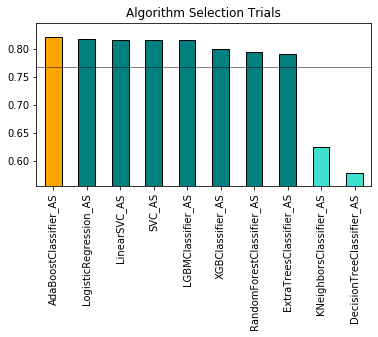

In [86]:
automl.visualize_algorithm_selection_trials()

In [87]:
automl.visualize_feature_selection_trials()

モデルトレーニングのハイパーパラメーターチューニングがどのように最適化されているかを確認します。パラメータ空間を反復する過程で、モデルはより良くなります。

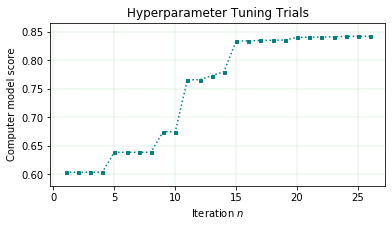

In [88]:
automl.visualize_tuning_trials()

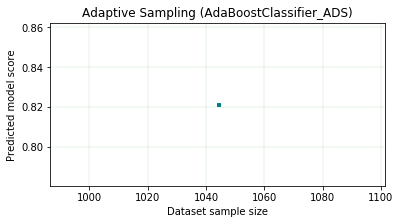

In [89]:
automl.visualize_adaptive_sampling_trials()

### Option Tasks

その他のAuto MLの機能を確認します。

In [ ]:
# model.selected_model_params_
# automl.visualize_algorithm_selection_trials()
# etc.

train()関数で指定できる下記オプションを確認します。
 - アルゴリズムの指定
 - 特徴量の指定

In [ ]:
model2, baseline2 = automl.train(model_list=['LogisticRegression',
                                           'LGBMClassifier',
                                           'XGBClassifier',
                                           'RandomForestClassifier'], 
                               score_metric = "roc_auc",
                               time_budget=160)

In [ ]:
model3, baseline3 = automl.train(model_list=['LogisticRegression',
                                           'LGBMClassifier',
                                           'XGBClassifier',
                                           'RandomForestClassifier'], 
                               min_features=['OverTime', 'JobLevel'], 
                               score_metric = "roc_auc",
                               time_budget=160)

---
<a id='modelevaluation'></a>
## <u>Task 5 : Model Evaluation</u>
##### https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/eval/eval.html

構築された予測モデルが、有効かどうかを評価します。ADSのワークフローの中でも特に重要なフェーズです。この技術領域は頻繁にエンハンスされ、今後も機能が追加されてゆきます。今現在、下記の分析に対応しています:

  - `回帰(regression)`
  - `バイナリ分類(binary classification)` 
  - `マルチクラス分類(multiclass classification)`
  
ADSは、複数のモデルで実行する複雑な計算をサポートするため、独自の評価関数（ `y_true`および` y_pred`シリーズを指定）を提供する機能もサポートします。

次のいくつかのセルでは、分類評価プロットの例をいくつか示します。 `ADSEvaluator（test、models = [model、my_model、baseline]`行の各モデルには、そのメトリックのシリーズがあります。これらは、比較のために重ね合わされています。これは、混同行列には意味がないため、並べて表示されます。

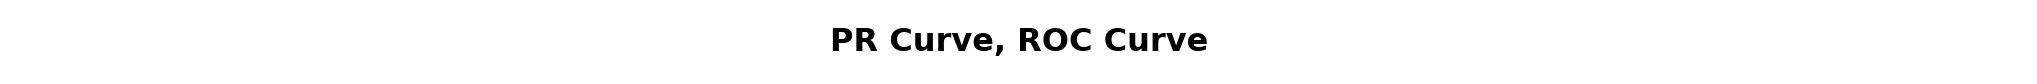

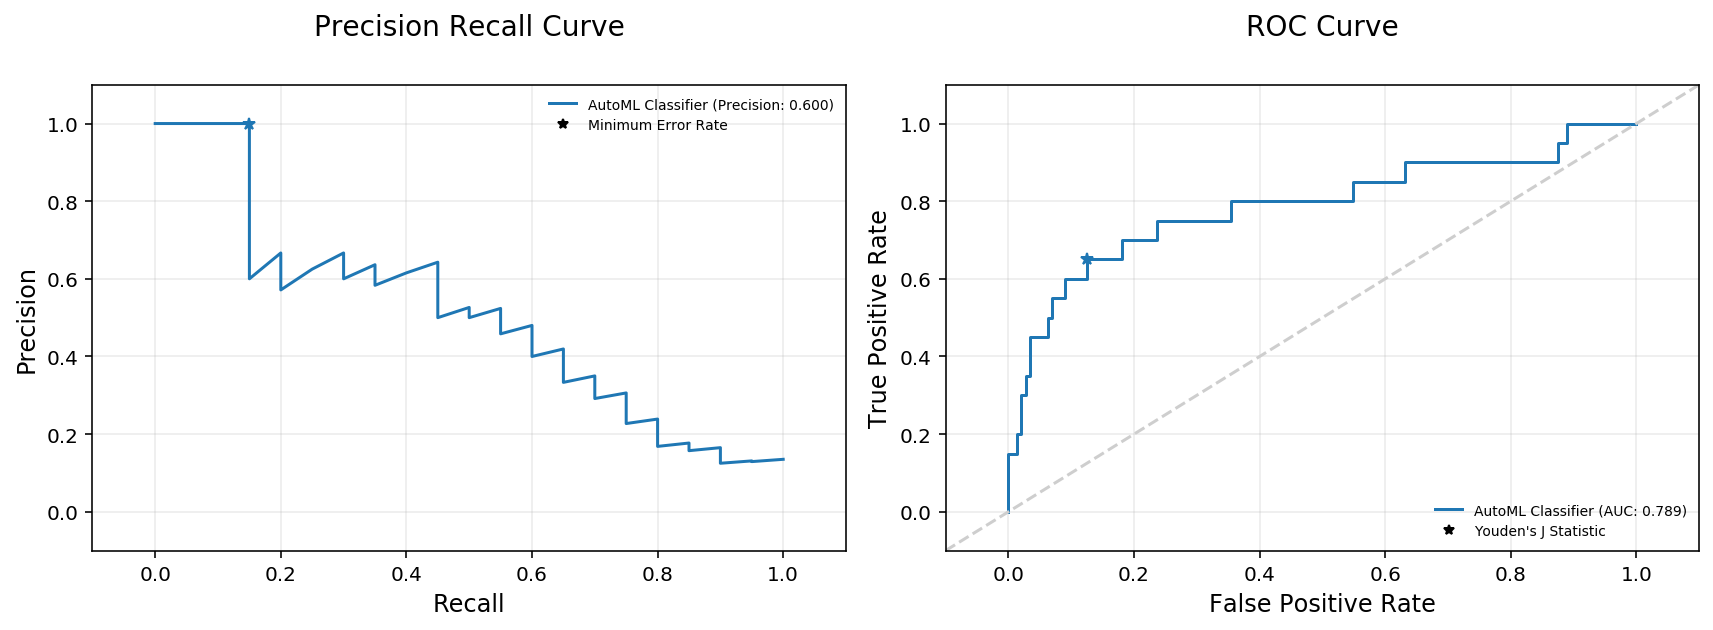

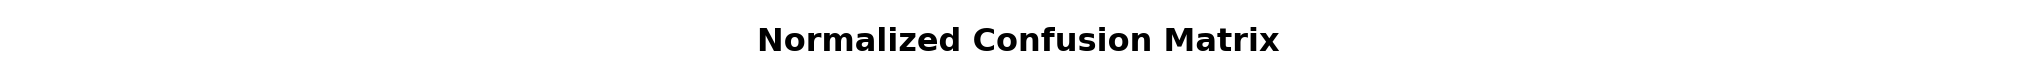

In [105]:
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import MLData

# evaluator = ADSEvaluator(test, models=[model, baseline], training_data=train)
evaluator = ADSEvaluator(test, models=[model], training_data=train)
evaluator.show_in_notebook()

### <u>Option Tasks - LightGBMのモデルを構築し、AutoMLのモデルと比較します</u>

これは、ADSがモデルの作成者を特定しない方法を示すためです。 ADSは、モデルのように見え、モデルのように歩く、アヒル型付けを利用します。これは、ADSにとってはモデルです。

In [34]:
from collections import defaultdict
from ads.common.model import ADSModel
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin
from category_encoders.ordinal import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

class DataFrameLabelEncoder(TransformerMixin):
    def __init__(self):
        self.label_encoders = defaultdict(LabelEncoder)
        
    def fit(self, X):
        for column in X.columns:
            if X[column].dtype.name  in ["object", "category"]:
                self.label_encoders[column] = OrdinalEncoder()
                self.label_encoders[column].fit(X[column])
        return self
    
    def transform(self, X):
        for column, label_encoder in self.label_encoders.items():
            X[column] = label_encoder.transform(X[column])
        return X

X = train.X.copy()
y = train.y.copy()

le = DataFrameLabelEncoder()
X =le.fit_transform(X)

sk_clf = RandomForestClassifier(random_state=42)
sk_clf.fit(X, y)

# Build an ads model from the SVM classifier
my_model = ADSModel.from_estimator(make_pipeline(le, sk_clf), name=sk_clf.__class__.__name__)


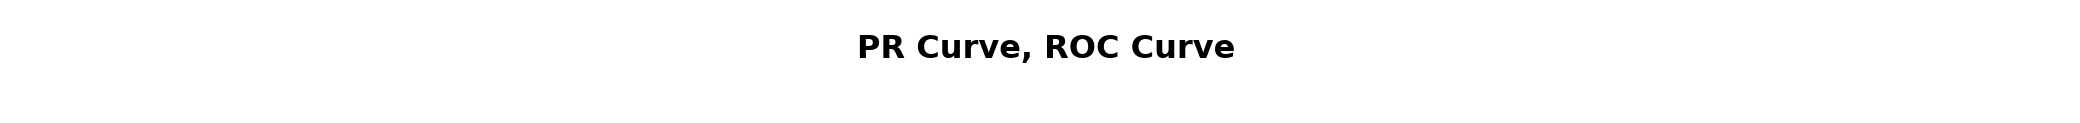

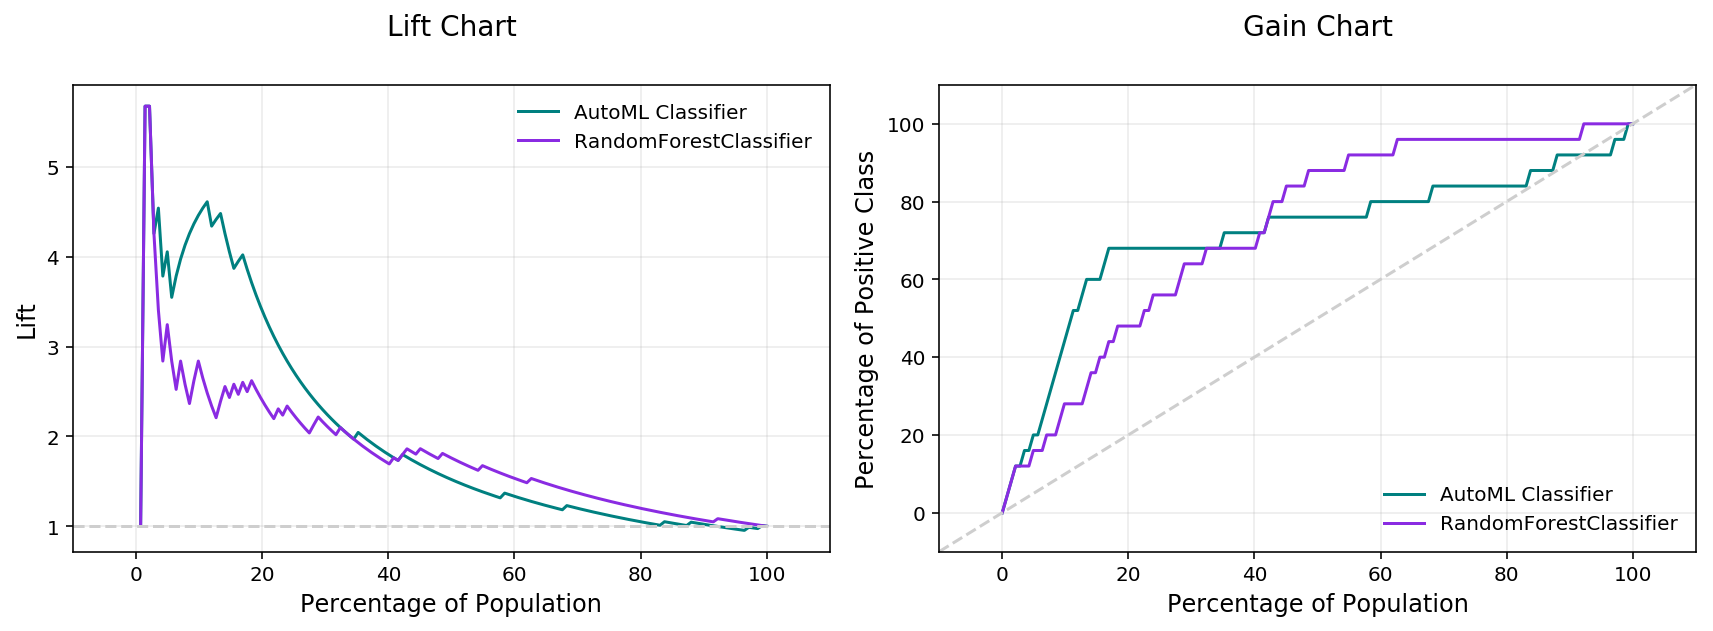

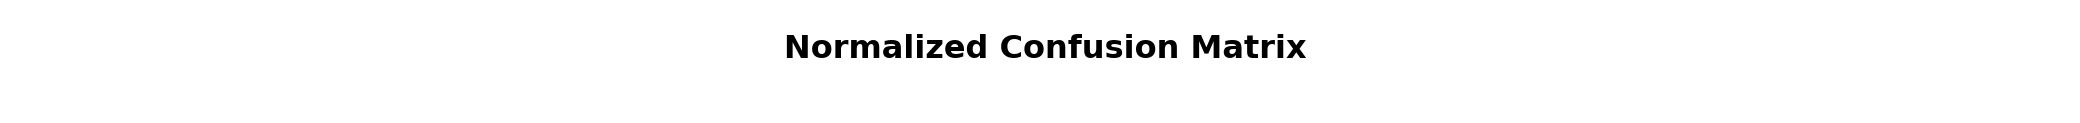

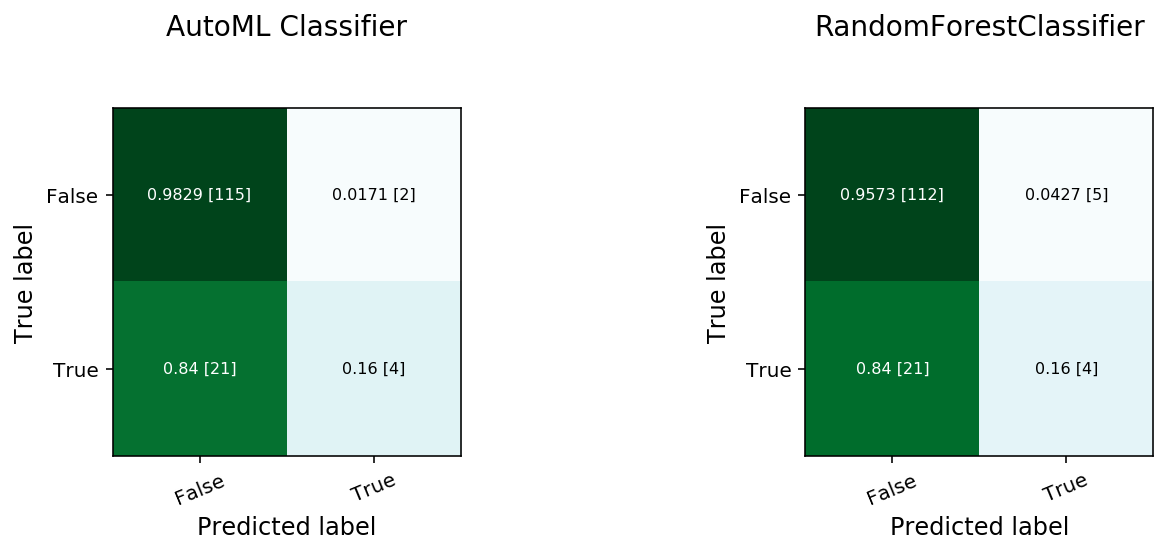

In [36]:
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import MLData

# evaluator = ADSEvaluator(test, models=[model, my_model, baseline], training_data=train)
evaluator = ADSEvaluator(test, models=[model, my_model], training_data=train)
evaluator.show_in_notebook()

---
<a id='modelexplainability'></a>
## <u>Task 6 : Model Explainability</u>
##### https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/mlx/mlx.html

機械学習と深層学習は下記の理由から普及してきました。  

  - さまざまな異なるドメインで複雑な問題を解決できる
  - 最新のコンピューティングリソースのパフォーマンスと効率の向上
  - 大量のデータの広範囲にわたる可用性
    
ただし、問題のサイズと複雑さが増し続けるにつれて、これらの問題に適用される機械学習アルゴリズムの複雑さも増しています。機械学習アルゴリズムの固有かつ増大する複雑さにより、モデルが学習したもの、または所定の予測が行われた理由を理解することが困難なため、機械学習の採用に対する障壁となる場合があります。

機械学習の説明可能性（MLX）は、機械学習モデルとディープラーニングモデルを説明および解釈するプロセスです。  

MLXは、機械学習開発者が次のことを行えるように支援します。
 - モデルの動作をよりよく理解して解釈します。
   - たとえば、モデルはどの特徴量を重要と見なしますか？特徴値とターゲット予測の間にはどのような関係がありますか？
 - モデルのデバッグと品質の向上。
   - たとえば、モデルは予期しないことを学びましたか？モデルは一般化されていますか、それともトレーニング/検証/テストデータセットに固有の何かを学習しましたか？
 - モデルの展開に対する信頼を高めます。
  
MLXは、機械学習アルゴリズムのエンドユーザーが次のことを行えるように支援します。
  - モデルが特定の予測を行った理由を理解します。
    - たとえば、銀行の融資が拒否されたのはなぜですか？
   
MLXのいくつかの有用な用語：
  - **説明可能性**：機械学習モデルの予測の背後にある理由を説明する機能。
  - **解釈可能性**：人間が説明を理解できるレベル。
  - **グローバルな説明**：機械学習モデル全体の動作を理解します。
  - **ローカルな説明**：機械学習モデルが単一の予測を行った理由を理解します。
  - **モデルに依存しない説明**：説明では、モデルのプロパティを使用して説明を導くのではなく、機械学習モデル（および特徴量の前処理）をブラックボックスとして扱います。

MLXは2つのタイプの解釈(ローカルとグローバル)を提供します。

## Feature Permutation Importance

特徴順列の重要性は、モデルにとらわれないグローバルな説明方法であり、機械学習モデルの動作に関する洞察を提供します。トレーニングされた機械学習モデルの予測に対する各特徴量の影響に基づいて、特徴量の重要度を推定してランク付けします。

### アルゴリズムの詳細

Feature permutation Importanceは、任意の特徴量が利用できない場合に予測エラーがどのように増加するかを評価することにより、ブラックボックス推定器、分類器、または回帰子の特徴量重要度を測定します。任意のスコアリングメトリックを使用して、予測エラーを測定できます（例：分類の $F1$ および回帰の $R^2$ ）。特徴量を実際に削除してEstimatorを再トレーニングしないようにするために、アルゴリズムは特徴量ごとにランダムに特徴量値をシャッフルし、特徴量にノイズを効果的に追加します。次に、新しいデータセットの予測誤差が元のデータセットの予測誤差と比較されます。モデルがシャッフルされている列に大きく依存してターゲット変数を正確に予測する場合（重要な特徴量、このランダムな並べ替えにより、予測の精度が低下します。モデルがその予測の特徴量に依存しない場合（重要ではない特徴量）、予測エラーは変更されません。


以下は、特徴順列の重要性の説明を計算する際の主なステップをまとめたものです。

- 訓練済みの機械学習モデルを使います。
- 特定のデータセット（トレーニングデータセットやテストデータセットなど）のベースライン予測エラーを計算します。
- 各特徴量について：
    1.指定されたデータセットの特徴列をランダムにシャッフルします。
    2.シャッフルされたデータセットの予測誤差を計算します。
    3.ベースラインスコアとシャッフルされたデータセットスコアの差を特徴量の重要度として保存します(例： $baseline$\_$score$ - $shuffled$\_$score$).
- 手順1〜3を複数回繰り返し、平均を報告してランダムシャッフルの影響を軽減します。
- 各特徴量がモデルのスコアに与える平均的な影響に基づいて、特徴量をランク付けします。シャッフルしたときにスコアに大きな影響を与える特徴量には、モデルのスコアにほとんどまたはまったく影響を与えない特徴量よりも高い重要度が割り当てられます。
- 場合によっては、重要でない特徴量をランダムに並べ替えると、実際にモデルの予測にプラスの影響を与える可能性があることに注意してください。そのような場合、モデルの予測に対する特徴量の寄与は、ノイズとなります。Feture Permutation Importanceの視覚化では、MLXは負の特徴量重要度値をゼロにと見なします。

### 出力の解釈

Feature Permutation Inportanceの説明は、重要度の値とともに特徴の順序付きリストを生成します。このアルゴリズムの出力の解釈は簡単です。ランクが高いフィーチャはモデル予測への影響が大きく、ランクが低いフィーチャはモデル予測への影響が小さくなります。さらに、重要度の値は、特徴量の相対的な重要度を表します。

The output supports two types of visualizations: 
出力は2つのタイプの視覚化をサポートします。
  - 横棒グラフ（「棒」）：棒グラフは、相対的な特徴量の重要性に関するモデルのビューを示します。 X軸は特徴量の重要性を強調しています。長いバーは短いバーよりも重要度が高いことを示します。各バーには、アルゴリズムのすべての反復における重要度値の標準偏差とともに、平均特徴量重要度値も表示されます（\ <$ mean $ \ _ $ importance $ \>±\ <$ standard $ \ _ $ deviation $ \>） 。上記のように、負の重要度の値はゼロに制限されます。Y軸は、さまざまな特徴量を相対的な重要度の順序で示しています（Y軸の上に表示れる特徴量ほど重要。)
  - 詳細な散布図（「詳細」）：詳細な棒グラフは、アルゴリズムの各反復の特徴量重要度値を示します。これらの値は、平均特徴量重要度値と、棒グラフに表示される対応する標準偏差を計算するために使用されます。 X軸は、特定の特徴量の置換がモデルの予測スコアに及ぼす影響を示します。 Y軸は、さまざまな特徴量を相対的な重要度の順序で示しています（上が最も重要、下が最も重要ではありません）。グラフの各ドットの色は、この反復の置換の品質を示します。これは、元の特徴列に対する置換された特徴列の相関を測定することによって計算されます（つまり、置換された特徴列と元の特徴の違いはどれくらいか）カラム）。

In [91]:
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer

# our model explainer class
explainer = ADSExplainer(test, model)

# let's created a global explainer
global_explainer = explainer.global_explanation(provider=MLXGlobalExplainer())

In [94]:
# Visualize the top 6 features as a bar chart
importances.show_in_notebook(n_features=6)

## Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) Explanations

PDPとICEは、モデルにとらわれないグローバルな説明方法であり、特徴値とターゲット変数間の関係を評価します。

### アルゴリズムの詳細

以下に、PDPまたはICEの説明を計算する際の主な手順を要約します。

  - 訓練済みの機械学習モデルを利用します。
  - 説明する特徴量を選択します（たとえば、グローバル特徴量の並べ替えの重要性の説明で特定された重要な特徴量）。
  - MLXは、トレーニングデータセットから抽出された選択された特徴の値分布を使用して、評価する特徴の分布から複数の異なる値を選択します。使用する値の数と考慮すべき特徴量の分布の範囲は設定可能です。
  - MLXは次に、提供されたデータセット内のすべてのサンプルを、特徴分布からの同じ特徴値で置き換え、拡張されたデータセットでモデル推論を計算します。このプロセスは、特徴の分布から選択されたすべての値に対して繰り返されます。特徴量の分布から $ N $ 個の異なる値が選択された場合、このプロセスにより$ N $個の異なるデータセットが生成されます。選択された特徴量はそれぞれ、対応するデータセットのすべてのサンプルで同じ値を持ちます。次に、モデル推論により、$ N $の異なるモデル予測が生成され、それぞれに$ M $値が含まれます（拡張データセットの各サンプルに1つ）。
  - ICEの場合、提供されたデータセット内の各拡張サンプルのモデル予測（選択された特徴量の値が特徴量分布の値で置き換えられた場合）は個別に考慮されます。これにより、$ N $ x $ M $の値が異なります。
  - PDPの場合、平均モデル予測は、提供されたすべての拡張されたデータセットサンプルにわたって計算されます。これにより、$ N $の異なる値が生成されます（それぞれ平均$ M $予測）。

### 出力の解釈

**PDP**
  - One-feature
      - 連続または離散数値特徴量：折れ線グラフとして視覚化。各線は、選択されたフィーチャが指定された値を持つ場合の、提供されたデータセットのすべてのサンプルにわたるモデルからの平均予測を表します。 x軸は選択された特徴値を示し、y軸はターゲット変数を示します（例：分類タスクの予測確率と回帰タスクの生の予測値）。
      - カテゴリ機能：縦棒グラフとして視覚化。各バーは、選択されたフィーチャに指定された値がある場合の、提供されたデータセットのすべてのサンプルにわたるモデルからの平均予測を表します。 X軸は選択した特徴量のさまざまな値を示し、Y軸はターゲット変数を示します（たとえば、分類タスクの予測確率と回帰タスクの生の予測値）。
  - Two-feature
      - ヒートマップとして視覚化。 x軸とy軸の両方に、選択された特徴値が表示されます。 Z軸（ヒートマップの色）は、選択されたフィーチャに対応する値がある場合の（提供されたデータセット内のすべてのサンプルにわたる）モデルからの平均予測を表します。
 
**ICE**
 - 連続または離散数値特徴量：折れ線グラフとして視覚化。 PDPは提供されたデータセットのすべてのサンプルの平均予測を示しますが、ICEは提供されたデータセットのすべてのサンプルを（選択された特徴量が指定された値で置き換えられた場合）個別にプロットします。 x軸は選択された特徴値を示し、y軸はターゲット変数を示します（例：分類タスクの予測確率と回帰タスクの生の予測値）。中央値は、傾向を強調するためにプロットできます。 ICEプロットは、特徴分布からの最初の予測を中心にすることもできます（つまり、各予測は、最初のサンプルから予測値を差し引きます）。
 - カテゴリー機能：バイオリンのプロットとして視覚化。 X軸は選択した特徴量のさまざまな値を示し、Y軸はターゲット変数を示します（たとえば、分類タスクの予測確率と回帰タスクの生の予測値）。
  
PDPとICEの両方のビジュアライゼーションは、対応する軸上の列車データセットからの特徴値分布を表示します。たとえば、1特徴量の折れ線グラフ、棒グラフ、およびバイオリンプロットは、x軸に特徴量値の分布を示します。ヒートマップは、それぞれのx軸またはy軸上の特徴値の分布を示します。

In [95]:
monthly_income = explainer.global_explanation().compute_partial_dependence("MonthlyIncome")

In [96]:
monthly_income.show_in_notebook(mode="ice", labels=[False], show_median=False)

In [97]:
monthly_income.show_in_notebook(mode="pdp", labels=[False])

### Option Tasks

他の特徴量についてもICE/PDPを確認します。

In [ ]:
%%bash

$ pdp_job_level = explainer.global_explanation().compute_partial_dependence("StockOptionLevel")
$ pdp_job_level.show_in_notebook(mode="pdp", labels=[False])
$ pdp_job_level.show_in_notebook(mode="ice", centered=True, show_distribution=True, show_correlation_warning=True, show_median=False)

## Local Explanations

機械学習モデルが特定の予測を行った理由についての洞察を提供します。

### アルゴリズムの詳細

モデルの動作全体を理解しようとするグローバルな説明方法とは異なり、ローカルの説明は、モデルが特定の予測を行った理由を解釈する際に用いられます。特定の特徴量はモデルにとって一般的に重要ですが、個々のサンプルの特定の値により、特定の特徴量が他の特徴量よりもモデルの予測に大きな影響を与える可能性があります。さらに、特定のサンプルの特徴値が与えられると、ローカル説明は予測されたターゲット変数に対する各特徴の寄与を見積もることができます（たとえば、特徴はターゲットクラスの予測確率を増加または減少させますか？特徴量は増加しますか？または予測回帰ターゲット変数を減らしますか？）。

MLXでサポートされている現在のローカル説明メソッドは、LIME（ローカル解釈可能モデル説明）の拡張バージョンです。 MLXは、説明の品質、パフォーマンス、およびLIMEよりも解釈性を向上させます。 LIMEの背後にある重要なアイデアは、機械学習モデルのグローバルな動作は非常に複雑になる可能性がある一方で、ローカルの動作ははるかに単純になる可能性があるということです。ここで、ローカルとは、類似したサンプルでのモデルの動作を指します。 LIMEは、単純で本質的に解釈可能な*代理モデル*を使用して、複雑な機械学習モデルのローカル動作を近似しようとします。たとえば、線形モデル。サロゲートモデルが複雑なモデルのローカル動作を正確に近似できる場合、解釈可能なサロゲートモデルから複雑なモデルの説明を生成できます。たとえば、線形モデルの係数の大きさと符号は、各変数がターゲット変数に与える影響を示します。

説明する（および特徴量の前処理を行う）複雑な機械学習モデルは、ブラックボックスと見なされます。そのため、説明するモデルを*ブラックボックスモデル*と呼びます。 MLXは現在、表形式またはテキストベース（単一のテキストベースの特徴量を含む）データセットの分類モデルと回帰モデルをサポートしています。

### 出力の解釈
 
MLXは、LIMEからのローカルの視覚化に複数の拡張機能を提供します。説明は、ブラックボックスモデルに関する情報、ローカルの説明者に関する情報、および実際のローカルな説明を含むグリッドとして表示されます。グリッドの各行には2つの列があります。これについては、以下で詳しく説明します。

　- Model（最初の行）
      -左の列には、ブラックボックスモデルとモデルの予測に関する情報が表示されます。たとえば、ブラックボックスモデルのタイプ、説明する選択したサンプルの真のラベル/値、ブラックボックスモデルからの予測値、予測確率（分類）または予測値（回帰）。
      -右側の列には、説明するサンプルが表示されます。表形式のデータセットの場合、これはこのサンプルの特徴量名と対応する値を示す表です。テキストデータセットの場合、これは説明するテキストサンプルを示します。
  - Explainer（2行目）
      -左側の列には、使用されている基本的なローカル説明アルゴリズム（LIMEなど）、サロゲートモデルのタイプ（線形など）、ランダムに生成されたローカルサンプルの数（5000など）、連続的かどうかなど、説明の構成パラメーターが表示されます特徴量が離散化されているかどうか（上記を参照）など。
      -右側の列には、モデルの説明を解釈する方法を説明する凡例が表示されます。これについては、以下で詳しく説明します。
  - Explanation (remaining rows)
      - 分類タスクの場合、ターゲットのラベルごとにローカルの説明を生成できます（代理モデルがブラックボックスモデルの予測確率に適合しているため）。バイナリ分類の場合、1つのクラスの説明は他のクラスを反映しています。多項分類の場合、説明では、各特徴量が指定されたターゲットクラスに対してどのように貢献するか、または反対するかについて説明します。特徴量が指定されたターゲットクラスに寄与する（つまり、予測確率が低下する）場合、1つ以上の他のターゲットクラスの予測確率が増加します。各ターゲットクラスの説明は、[説明]セクションの個別の行に表示されます。
      - 左の列は、実際の現地の説明を示しています。説明は、特徴量の重要度の値の横棒グラフとして視覚化され、相対的な特徴量の重要度順に並べられています。大きなバー（上部）のある特徴量は、短いバー（下部）のある特徴量よりも重要です。特徴量の重要度が正の値（右側）は、その特徴量が予測ターゲット値を増加させることを示します。 （左側の）負の特徴量重要度値は、特徴量が予測ターゲット値を減少させることを示します。上記のように、連続した特徴が離散化されるかどうかによって、この値の解釈が変わります（つまり、特定の特徴値が正/負の属性を示すか、または特徴値の増減が正/負の属性を示すかどうか） ）。特徴が離散化されている場合、対応する範囲が含まれます。特徴量の重要度の値は、各バーの横に表示されます。これは、線形サロゲートモデルから取得した生の係数にすることも、すべての重要度の値が1になるように正規化することもできます。
      
    テキストデータセットの場合、説明は*ワードクラウド*として視覚化されます。特定の予測に大きく貢献する（つまり、予測値を増やす）重要な単語は、ターゲット予測への影響が少ない重要でない単語よりも大きく表示されます。
      -  右側の列は、説明の「品質」についての情報を示しています。さらに2つのセクションに分かれています。
          1. ローカルサロゲートモデルの忠実度
              -このセクションでは、線形サロゲートモデルの近似に使用されるランダムに生成されたサンプル空間でのブラックボックスモデルに対するサロゲートモデルの忠実度を示します。つまり、このセクションでは、代理モデルが複雑なブラックボックスモデルのローカル動作をどれほど正確に近似しているかを評価します。複数の異なる回帰および分類メトリックがサポートされています。分類タスクの場合、MLXは回帰メトリックと分類メトリックの両方をサポートします。回帰メトリックは、サロゲートモデルとブラックボックスモデル間の生の予測確率で計算されます。分類指標の場合、予測確率は対応するターゲットラベルに変換され、サロゲートモデルとブラックボックスモデル間で比較されます。回帰タスクの説明では、回帰メトリックのみがサポートされています。サポートされる回帰メトリック：*** MSE ***、*** RMSE ***（デフォルト）、$ R ^ 2 $、*** MAPE ***、*** SMAPE ***、*** 2つのサンプルKolmogorov-Smirnov Test ***、*** Pearson Correlation ***（default）、および*** Spearman Correlation ***。サポートされる分類メトリック：*** F1 ***、*** Accuracy ***、*** Recall ***、および*** ROC_AUC ***。
          2. Fidelity vs. Locality (Only supported for tabular datasets)
              - 忠実度と局所性（表形式のデータセットでのみサポート）
              -上記のローカルサロゲートモデルの忠実度セクションでは、サロゲートモデルの適合に使用されるランダムに生成された単一のサンプルスペースでサロゲートモデルの忠実度を評価します。このセクションでは、説明するために、サンプルからますます離れた距離で、複数の異なる除外テストセットでサロゲートモデルの忠実度を評価します。ここでの目標は、ローカルサロゲートモデルの*ローカルの忠実度*を測定することです。定義に基づいて、ローカルサロゲートモデルは、説明するサンプルに近いサンプルのブラックボックスモデルと高い忠実度を持ち、説明するサンプルからさらに離れた場所でサンプルを評価するときに悪化するか、同じままである必要があります。説明するサンプルの周りの異なるサイズの半径の*超球*内に制約された複数のサンプルスペースをランダムに生成します（サンプルからの距離のパーセンタイルに基づいて計算され、列車セット内の他のすべてのサンプルに説明されます）。次に、これらの各サンプルスペースで、ブラックボックスモデルに対する代理モデルの忠実度を評価します。結果は折れ線グラフとして表示され、x軸は説明するサンプルからの距離の増加を示し、y軸は各評価ポイントでの対応する忠実度メトリックを示します。 *** MSE ***、*** RMSE ***（デフォルト）、$ R ^ 2 $、*** MAPE ***、および*** SMAPE ***の回帰メトリックのみがサポートされています。
          3. Performance
              - 秒単位の説明時間。 
              
---

In [98]:
# With ADSExplainer, create a local explanation object using the MLXLocalExplainer provider
from ads.explanations.mlx_local_explainer import MLXLocalExplainer

local_explainer = explainer.local_explanation(provider=MLXLocalExplainer())

In [99]:
# Select a specific sample (instance/row) to generate a local explanation for
sample = 2

In [100]:
test.X.iloc[sample:sample+1]

Age TravelForWork  SalaryLevel         JobFunction  CommuteLength  \
8  39.0         often        990.0  Software Developer           24.0   

  EducationalLevel EducationField  EmployeeNumber  EnvironmentSatisfaction  \
8               L3  Life Sciences            12.0                      4.0   

  Gender  ...  RelationshipSatisfaction  StockOptionLevel  YearsinIndustry  \
8   Male  ...                       2.0               0.0             10.0   

  TrainingTimesLastYear  WorkLifeBalance YearsOnJob  YearsAtCurrentLevel  \
8                   2.0              3.0        9.0                  7.0   

   YearsSinceLastPromotion  YearsWithCurrManager        name  
8                      1.0                   8.0  Kayla Ward  

[1 rows x 32 columns]

In [101]:
test.y.iloc[sample:sample+1]

8    False
Name: Attrition, dtype: bool

In [102]:
test

Test Data
Shape of X:(164, 32)
Shape of y:(164,)

In [103]:
# Compute the local explanation on our sample from the test set
explanation = local_explainer.explain(test.X.iloc[sample:sample+1], test.y.iloc[sample:sample+1])

In [104]:
# Visualize the explanation for the label True (Survived). 
# See the "Interpretation" section above for more information
explanation.show_in_notebook(labels=True)

### 予測を実行する(AutoMLモデルを使用)

In [38]:
# (X, y) = test.X.iloc[0:1], test.y.iloc[0:1]
X = test.X.iloc[0:1]

In [39]:
X

Age TravelForWork  SalaryLevel         JobFunction  CommuteLength  \
4  28.0    infrequent       2710.0  Software Developer            3.0   

  EducationalLevel EducationField  EmployeeNumber  EnvironmentSatisfaction  \
4               L1        Medical             7.0                      1.0   

  Gender  ...  RelationshipSatisfaction  StockOptionLevel  YearsinIndustry  \
4   Male  ...                       4.0               1.0              6.0   

  TrainingTimesLastYear  WorkLifeBalance YearsOnJob  YearsAtCurrentLevel  \
4                   3.0              3.0        2.0                  2.0   

   YearsSinceLastPromotion  YearsWithCurrManager               name  
4                      2.0                   2.0  Johnathan Burnett  

[1 rows x 32 columns]

In [40]:
model.predict(X)

array([False])

<a id='savemodel'></a>
## <u>Task 7 : Save Your Model to Your Catalog</u>
##### https://docs.cloud.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/modelcatalog/modelcatalog.html
最後に、モデルのすべての部分を理解できたので、従業員の離脱を予測するのに役立つと結論付けることができます。このノートブック、およびモデルを作成するために必要なすべての正確な環境条件を保存するのではなく、モデルをOCIモデルカタログに保存してみましょう。これを行うには、まずモデルを準備する必要があります。

### Object Storage Serviceへのアクセスのための設定

下記を実行し、エラーが出力される場合は、OCI Native ユーザーではなく Federated ユーザーを利用している可能性があります。

In [ ]:
assert(re.search("ocid[0-9]?.user.*", os.environ['USER_OCID'])), "ERROR: INVALID USER_OCID!\nIt looks like you are a federated user, please see screenshot below to copy your user OCID.\nAfter you have found your USER_OCID from the cloud console, replace $USER_OCID in the cell below."

下記を実行し、configファイルを作成します。上記コマンドでエラーが出力された場合は、oci consoleから利用ユーザーのOCIDを確認し、環境変数USER_OCIDを置き換えます。

注意：下記を実行すると、必要な情報が記載された ~/.oci/config ファイルが作成され、ociへのアクセス設定に必要な鍵ペアが作成されます。既に用意している鍵ペアを利用する場合はこのcellの処理はスキップしてください。

In [ ]:
%%bash 

# Note: your user OCID and replace $USER_OCID **ONLY** if your user is a federated user (see cell above). 
# Otherwise do nothing and execute this cell. This cell creates and OCI config and key files 
# on your behalf. 
export USER_OCID=${USER_OCID}

export BLOCK_STORAGE_PATH=/home/datascience
rm -rf ${BLOCK_STORAGE_PATH}/.oci 
rm -rf /home/datascience/.oci

oci setup keys --output-dir ${BLOCK_STORAGE_PATH}/.oci --overwrite --passphrase 'a' > tmp_file
export FINGERPRINT=$(grep "Public key fingerprint: " tmp_file | cut -c 25-)

echo [DEFAULT] > ${BLOCK_STORAGE_PATH}/.oci/config
echo user = $USER_OCID >> ${BLOCK_STORAGE_PATH}/.oci/config
echo fingerprint = $FINGERPRINT >> ${BLOCK_STORAGE_PATH}/.oci/config
echo tenancy = $TENANCY_OCID >> ${BLOCK_STORAGE_PATH}/.oci/config 
echo region = $NB_REGION >> ${BLOCK_STORAGE_PATH}/.oci/config
echo key_file = ~/.oci/oci_api_key.pem >> ${BLOCK_STORAGE_PATH}/.oci/config
echo pass_phrase=a >> ${BLOCK_STORAGE_PATH}/.oci/config
ln -s ${BLOCK_STORAGE_PATH}/.oci /home/datascience/.oci
oci setup repair-file-permissions --file /home/datascience/.oci/config 
rm ./tmp_file

# print the content of your configuration file: 
echo "The content of your configuration file:"
echo ""
head -n 15 ${BLOCK_STORAGE_PATH}/.oci/config

### モデル・アーティファクトを保存するディレクトリを作成します

In [ ]:
$ mkdir /home/datascience/model
$ mkdir /home/datascience/model2

In [63]:
from ads.catalog.model import ModelCatalog
from ads.catalog.project import ProjectCatalog
from ads.common.model_artifact import ModelArtifact

model_artifact = model.prepare("/home/datascience/model/", force_overwrite=True)
model_artifact2 = baseline.prepare("/home/datascience/model2/", force_overwrite=True)

Generated model artifact files under '/home/datascience/model/'. Please update the inference script (score.py) as required.


Generated model artifact files under '/home/datascience/model2/'. Please update the inference script (score.py) as required.


モデルアーティファクトをストレージ用に準備したので、クラウドストレージの場所を選択できます。保存したいcompartment_idと関連するプロジェクトを選択します。これらは環境に保存され、以下を使用してプルできます。

In [68]:
import os
compartment_id = os.environ['NB_SESSION_COMPARTMENT_OCID']
project_id = os.environ["PROJECT_OCID"]

In [69]:
mc_model = model_artifact.save(project_id=project_id, compartment_id=compartment_id, display_name="HOL_my_model_1", description="HOL_ADS_Bin_Classification", training_script_path="HOK_ads_binary-classification-workflow-attrition.ipynb", ignore_pending_changes=True)
mc_model

ERROR:ADS Exception
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/oci/_vendor/urllib3/connection.py", line 163, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/opt/conda/lib/python3.6/site-packages/oci/_vendor/urllib3/util/connection.py", line 84, in create_connection
    raise err
  File "/opt/conda/lib/python3.6/site-packages/oci/_vendor/urllib3/util/connection.py", line 74, in create_connection
    sock.connect(sa)
TimeoutError: [Errno 110] Connection timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/oci/_vendor/urllib3/connectionpool.py", line 604, in urlopen
    chunked=chunked)
  File "/opt/conda/lib/python3.6/site-packages/oci/_vendor/urllib3/connectionpool.py", line 347, in _make_request
    self._validate_conn(conn)
  File "/opt/conda/lib/python3.6/site-packages/oci/_vendor/urllib3/connectionpool.py

### モデルカタログから読み込まれたAutoMLモデルで予測を実行する

In [29]:
model_artifact = ModelArtifact('/home/datascience/model')
model_artifact.reload()
modelLoaded = model_artifact.model

print(type(modelLoaded))

modelLoaded.predict(X)

<class 'ads.common.model.ADSModel'>


array([False])

### カタログからサンプルモデルを削除する

このサンプルノートブックでの作業が終了したら、モデルカタログに保存されているサンプルモデルを削除する必要があります。 **クラウドストレージに保存する必要がある独自のモデル、作業中のノートブックセッション、アクティブなプロジェクトは削除しないでください。**サンプルモデルを削除するには、 `ModelCatalog（）。delete_model（）`メソッドを使用します。これには、文字列として削除するモデル、またはModelインスタンス。このノートブックでは、 `mc_model`を削除する必要があります。

In [30]:
mc = ModelCatalog(compartment_id=compartment_id)
mc.delete_model(mc_model)

# to delete with id of model:
# mc.delete_model("model.id string starts with ocid1.")

True

---
## まとめ

このハンズオンラボでは、サンプルのグラフィックデータセットを使った簡単なバイナリ分類の問題を通して、以下の項目を学びました。

- 機械学習のワークフロー
- Accerlerated Data Science APIの基本的なコードの流れ
- Oracle AutoMLによるモデル構築の自動化
- Oracle MLXによるモデルの解釈
- モデルカタログの仕組み
